In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("memmap_results.csv",sep=",",header=0)
df.head()

,function,matrix,time
0,svd_numpy_naive,rd_3x1,0.021781
1,svd_numpy_naive,rd_30x10,0.018254
2,svd_numpy_naive,rd_300x100,0.057245
3,svd_numpy_naive,rd_3000x1000,3.323175
4,svd_numpy_naive,rd_30000x10000,557.607689


In [3]:
np_memmap_result = []
for i in range(5):
    dim_str = df["matrix"][i].split("_")[-1]
    dim = tuple(map(lambda x : int(x),dim_str.split("x")))

    np_memmap_result.append((dim, df["time"][i]))
np_memmap_result


[((3, 1), 0.0217810216665839),
 ((30, 10), 0.0182544710000532),
 ((300, 100), 0.0572447336666831),
 ((3000, 1000), 3.323175254999986),
 ((30000, 10000), 557.6076892753332)]

In [4]:

matrix_size = np.array([np_memmap_result[i][0][0] * np_memmap_result[i][0][1] for i in range(len(np_memmap_result))])/3
time_val = [np_memmap_result[i][1] for i in range(len(np_memmap_result))]
print(matrix_size)
print(time_val)

[1.e+00 1.e+02 1.e+04 1.e+06 1.e+08]
[0.0217810216665839, 0.0182544710000532, 0.0572447336666831, 3.323175254999986, 557.6076892753332]


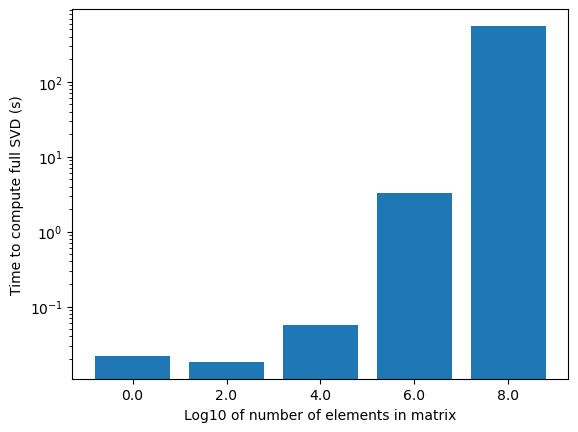

In [5]:
fig, ax = plt.subplots()
x = [i for i in range(5)]
ax.bar(x,time_val)
ax.set_xticks(x, np.log10(matrix_size))

ax.set_ylabel("Time to compute full SVD (s)")
ax.set_xlabel( "Log10 of number of elements in matrix")
ax.set_yscale( 'log')


plt.show()


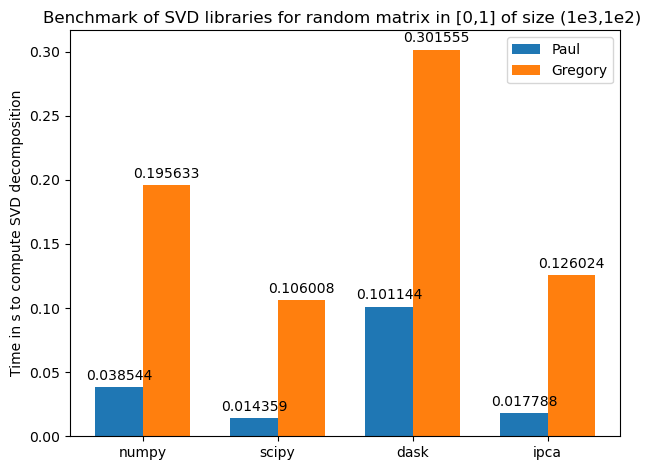

In [30]:
# x = np.arange(len(labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()

# rects1 = ax.bar(x - width/2, paul_values, width, label='Paul')
# rects2 = ax.bar(x + width/2, gregory_values, width, label='Gregory')

# ax.set_ylabel('Time in s to compute SVD decomposition')
# ax.set_title("Benchmark of SVD libraries for random matrix in [0,1] of size (1e3,1e2) ")
# ax.set_xticks(x, labels)
# ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

# fig.tight_layout()

# plt.show()